# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


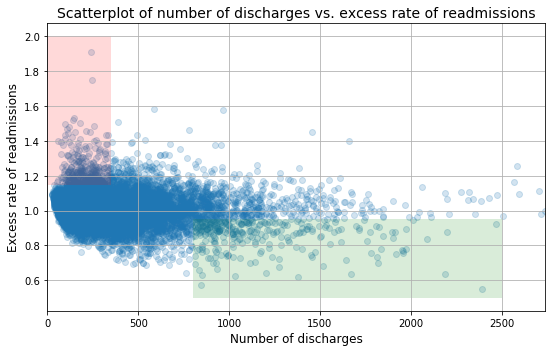

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
# Your turn

# Answers

## A. Do you agree with the above analysis and recommendations? Why or why not?

* Overall, rate of readmissions is trending down with increasing number of discharges <br>
<span style="color:blue">Answer: based on linear fitting (1st order polynomial), the downward trend is not obvious as represented by a small negative slope of -2.85e-5. <br><br></span>

* With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
* With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) <br>
<span style="color:blue">Answer: It is hard to conclude there is any statistical difference, as the data inside the red and green shaded areas may occur purely by chance. <br><br></span>


**Polynomial Fitting (1st/2nd/3rd order)**

Linear fitting: slope = -2.856505294381995e-05


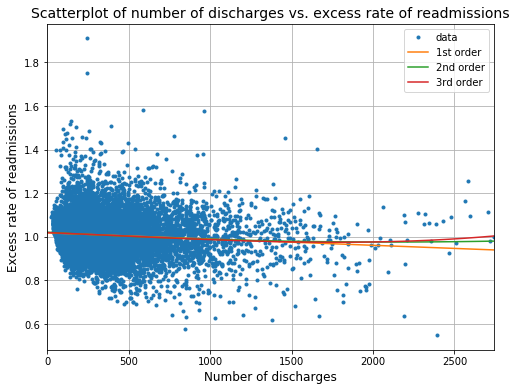

In [24]:
z1 = np.polyfit(x, y, 1)  # x=number of discharges, y = excess readmission ratio (ERR)
p1 = np.poly1d(z1)
print('Linear fitting: slope = {}'.format(z1[0]))
z2 = np.polyfit(x, y, 2)  # x=number of discharges, y = excess readmission ratio (ERR)
p2 = np.poly1d(z2)
z3 = np.polyfit(x, y, 3)  # x=number of discharges, y = excess readmission ratio (ERR)
p3 = np.poly1d(z3)
xp = np.linspace(0, max(x), 100)
plt.figure(figsize=[8,6])
plt.plot(x, y, '.', xp, p1(xp), xp, p2(xp), xp, p3(xp))
plt.legend(['data','1st order','2nd order','3rd order'])
plt.xlim([0, max(x)])
plt.xlabel('Number of discharges', fontsize=12)
plt.ylabel('Excess rate of readmissions', fontsize=12)
plt.title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)
plt.grid()
plt.show()

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
    <br>
    <p style="color:blue"> Answer: <br>
    Given: <br>
    - p1 = mean ERR for hospitals/facilities with number of discharges < 100; <br>
    - p2 = mean ERR for hospitals/facilities with number of discharges > 1000; <br>
    
    Hypothesis: <br>
    - H0: p1 = p2 <br>
    - H1: p1 != P2 <br>
    <br><br>
    
    </p> 
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client? <br>
   <span style="color:blue"> Answer: based on two-sample statistical tests below, the p-value is much smaller than $\alpha$ = .01. Thus, the Null Hypothesis is rejected, and it is concluded that there is a stastitical difference between the mean ERR for hospitals/facilities with number of discharges $<$ 100 and $>$ 1000. A positive z-score or t-score suggests that ERR(x$<$100) $>$ ERR(x$>$1000). </span> <br> <br>
   
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.
      
      <p style="color:blue"> Answer: <br>
      - Advantage: all data are displayed <br>
      - Disadvantage: interpretation may be biased by outliers <br>
      - The same information more be conveyed more directly with ECDF plots as shown below <br>
      </p>

In [33]:
# extract the ERR (y) for number of discharge: x < 100 or x > 1000
y_xlessthan_100 = [y1 for x1, y1 in zip(x, y) if x1 < 100]
y_xmorethan_1000 = [y1 for x1, y1 in zip(x, y) if x1 > 1000]

In [37]:
from scipy.stats import ttest_ind, ttest_1samp  # two-sample, one-sample t-test
from statsmodels.stats.weightstats import ztest  # z-test

In [40]:
# z-test
z_stat, p_val = ztest(y_xlessthan_100, y_xmorethan_1000,  value=0)
print('z statistics = {}, p value = {}'.format(z_stat,p_val))
if p_val < 0.05:
    print('Reject H0, there is a significant difference.')
else:
    print('Cannot Reject H0, there is no significant difference.')

z statistics = 9.914442964326538, p value = 3.602603744810593e-23
Reject H0, there is a significant difference.


In [41]:
# two sample t-test
t_stat, p_val = ttest_ind(y_xlessthan_100, y_xmorethan_1000, equal_var=False)
print('t statistics = {}, p value = {}'.format(t_stat,p_val))
if p_val < 0.05:
    print('Reject H0, there is a significant difference.')
else:
    print('Cannot Reject H0, there is no significant difference.')

t statistics = 7.490062060325073, p value = 2.7928704570174404e-13
Reject H0, there is a significant difference.


**The above statistics suggest there is a signficant difference. **

### Visualize the differnce by ECDF Plot

In [42]:
def _ecdf(data):
    ### Compute Empirical Cumulative Distribution Function (ECDF) for a one-dimensional array of measurements. ###
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, len(x)+1) / n
    return x, y

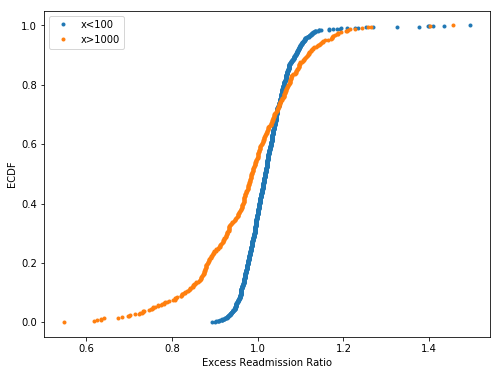

In [52]:
xx1,yy1 = _ecdf(y_xlessthan_100)
xx2,yy2 = _ecdf(y_xmorethan_1000)
# plot the Empirical Cumulative Distribution Function (ECDF)
plt.figure(figsize = (8, 6));
plt.plot(xx1,yy1,marker='.',linestyle='none',label='x<100');
plt.plot(xx2,yy2,marker='.',linestyle='none',label='x>1000');
plt.xlabel('Excess Readmission Ratio');
plt.ylabel('ECDF');
plt.legend()
plt.show()

** The difference between two groups (x$<$100) and (x$>$1000) are much clearer visualized above! **

===== END =====